## Background

Uncertainty is a facininating concept. It is extremely vast and applies to almost all aspects of life. You could spend your entire life learning about it and still not understand all of it.
Uncertainty is everywhere, in everything we do. For example, uncertainty affects the economy in many ways. Peoples attitude to spending are usually based on their level of confidence in the economy. Uncertainty of our future climate drives us to recycle more, burn more efficient fuel, reduce our emmisions and respect the environment. In a sense, it is almost motivational as once we are aware of something, we typically strive to improve it.
In science, we frequently measure or observe things. We do this so that we can understand them better. By putting a measure on something it allows us to describe something, to visualise it or to comprehend it. Humans will design an experiment or build a model to test or measure something and uncertainty will be the measure of the doubt that exists about the result or prediction. That uncertainty is in large made up of phenomena that affect the observations themselves.  

## Project - Dataset

This project will focus on the field of dimensional metrology and more specifically, measurement systems. A measurement system might be described as a system encompassing the measuring instrument, the software, firmware, people/users, environment, method and the articles that they inspect. When designing a measurement system many aspects must be considered but ultimately the system should have an acceptable accuracy and variance for what it is designed to inspect. In conjunction with this, each measurement result should be accompanied by an uncertainty value since no measurement is ever perfect. When a measurement is taken, many phenomena can occur to influence that result and generally speaking that influence could be captured in the overall uncertainty. Estimating this uncertainy, it is possible to mitigate for the risk of misclassification based off results/observations made.         

## Scenario

You are asked to provide consultation to an aerospace company that manufactures a component. Post manufacture it inspects each component dimensionally to ensure it meets design intent/criteria. The component itself has 4 geometric features that must be verified through inspection, each having a nominal size and an associated tolerance. A measurement system is used to inspect the components to meet volume requirements. There is an issue with this component when it comes to final assembly. It is not fitting with other components at the final assembly plant located in another country. The equipment was installed correctly, has all the necessary certified paperwork and is passing its daily qualification checks. What is going on?

The brief of the project is to create a synthetic dataset. This dataset will attempt to capture what the above situation might look like (in a fairly simplistic approach with assumptions) if it were a real investigation of the measurement, the phenomena that affect it and try to answer some additional questions along the way.

## Investigation

Investigation starts with the component. It has four geometric features that are inspected. They are relatively simple in terms of geometric complexity. Two features are lengths, one is a width and other is a diameter. There are no complex surfaces or advanced geometric constraints to be inspected.

The features with associated tolerances are:

$$length1 = 14.010mm +/- 0.020$$
$$length2 = 10.050mm +/- 0.050$$ 
$$width1  =  50.200mm +/- 0.100$$ 
$$dia1 = 30.000mm +/- 0.070$$

Instruments:

It was found that the instrument is a coordinate measuring machine, often referred to as 'CMM'. For now lets call it instrument_1
It has an old calibration certificate stating the equipments maximum permissable error for error of length indication. After speaking with the OEM, it is understood that this is essentially an accuracy statement for the equipment when measuring length type features.

It is stated in linear type form:  MPEE  = X + L/K   where X and K are constants. (x = um, L = mm, K = no units)

$$MPEe  = 2.8 + L/1000$$

The certificate shows that instrument_1 was verified but not calibrated and 2 months ago. It is noted that instrument_1 has a negative bias of 0.005mm. As it was only verified and not calibrated, no adjustment was made for this. The instrument does not exibit any other systematic errors.
The verification stated a verification uncertainty of 0.1% of mean readings.
The divisions on the scale of the instrument have a resolution of +/- 0.001mm.

Users:

Looking at users of the measurement system, It was discovered that one operator was responsible for running the system.
Mary ran instrument_1 and was quite experienced. A standardised method for use of the equipment was also in place. 

Environment:

Instrument_1 was located in a temperature controlled room cerified at 19-21 deg C. However, the climate control was malfunctioning and the temperature was found to be at a static 25 Deg C.


## Summary of Investigation

After further investigation I decide the following:

(1) I need to pull some previous data on measurements and review the results for each feature (2) I need to calculate what the likely instrument error is for measurements of each feature (3) I need to compensate for bias in the equipment (4) I need to investigate the effects of temperature (5) estimate any likely variance (6) estimate what the overall uncertainty might be and (7) analyse the data and generate any conclusions.  

## Simulating the results from 100 components

I would expect the results to be normally distributed for each feature. I'm going to make a few assumptions here. Having reviewed the measurment results I found that length_1 and width_1 were manufactured above centre/target nominal. The other features were relatively centred on nominal. All data should be floating point numbers and should be positive values based on the specifications above.

In [1]:
#import modules and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline


#define the features, 100 samples each having different stdev and means
#Means set to match the features specifications or close to spec. STDEV set a little high to simulate variance 
length_1 = np.random.normal(14.011, 0.007, 100)
length_2 = np.random.normal(10.050, 0.008, 100)
width_1 = np.random.normal(50.210, 0.009, 100)
dia_1 = np.random.normal(30.000, 0.008, 100)

#create a dataframe with initial data in it. df should have values for all 4 features. I could just call the variables above but just showing programming method.
df = pd.DataFrame({'length_1':np.random.normal(14.011, 0.007, 100),'length_2':np.random.normal(10.050, 0.008, 100),'width_1':np.random.normal(50.210, 0.009, 100),'dia_1':np.random.normal(30.000, 0.008, 100)}) 

#df.head(3)

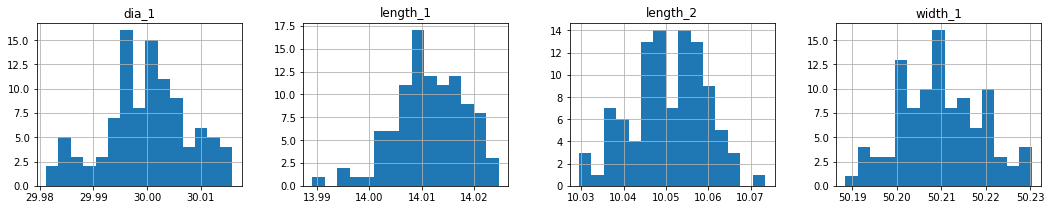

In [2]:
# a quick visual check of the data in the dataframe using pandas.
hist = df.hist(bins=15,figsize=(18,3), layout=(1,4))



## Instrument Accuracy


In [3]:
#mpe = max permissable error. if using another instrument, change this accordingly
mpe = 2.8

#calculating the likely accuracy achieved over the lengths of each feature
#here, 'L' is substituted with the typical nominal value for each feature
err_length_1 = (2.8 + 14.010/1000)/1000
err_length_2 = (2.8 + 10.050/1000)/1000
err_width_1 = (2.8 + 50.200/1000)/1000
err_dia_1 = (2.8 + 30.000/1000)/1000

#print the approximate errors to 5 decimal places
print("Approximate Errors due to equipment accuracy are:")
print ("%.5f" %err_length_1, "%.5f"% err_length_2,"%.5f"% err_width_1,"%.5f"% err_dia_1)

Approximate Errors due to equipment accuracy are:
0.00281 0.00281 0.00285 0.00283


This gives me an idea of the likely accuracy associated with each feature when using this specific instrument. It's a first step in looking for any potential misclassification issues but it doesn't tell the entire story. Since the parts are not actually all the same length maybe a better way to estimate this would be to apply the formula to each result obtained in the 100 samples and then add that (or take away) to either the same dataframe or a seperate one and then join them. For the purpose of this exercise, lets assume that i'm only interested in the positive error since the components are not fitting in final assembly and are assumed to be too large. In reality i don't know. It might be the opposite or it might be neither.

In [4]:
#create a new dataframe called df1 with length error included. 
df1 = pd.DataFrame({'err_length_1':err_length_1 + length_1,'err_length_2':err_length_2 + length_2,'err_width_1':err_width_1 + width_1,'err_dia_1':err_dia_1 + dia_1})
#df1.head(3)

In [5]:
#join the dataframes df and df1. df1 gets joined to the right of df. name the new df df3.
left = df
right = df1
df3 = pd.concat([df,df1], axis=1)
#df3.head(3)

## Bias

As mentioned earlier the calibration certificate stated a negative systematic error of 5.0um or 0.005mm. The instrument was falsely reading 0.005 too low. This will have to be added to dataset.

In [6]:
# bias defined. the value here comes from the problem description above. This was 'as found'.
bias = 0.005
#create df4. it will include adjustments for bias
df4 = pd.DataFrame({'bias_length_1':length_1 + bias,'bias_length_2':length_2 + bias,'bias_width_1':width_1 + bias,'bias_dia_1':dia_1 + bias})

#defining bias variables
bias_length_1 = length_1 + bias
bias_length_2 = length_2 + bias
bias_width_1 = width_1 + bias
bias_dia_1 = dia_1 + bias

In [7]:
#create df5. this is a join of df3 and df4
df5 = pd.concat([df3,df4], axis=1)

Text(0.5,1,'Effects of bias on the measurement')

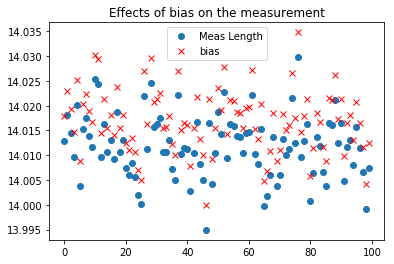

In [8]:
#import modules and libraries
import matplotlib.pyplot as plt
import pandas as pd
#setting c = the two items i want to plot
c = {'Meas Length':length_1,'bias':bias_length_1}   
#the dataframe is dataframe(c) which i defined above as bias and meas
df=pd.DataFrame(c)
#plot and give meas length a circle, bias a red x
df.plot(style=['o','rx'])
plt.title("Effects of bias on the measurement")

## Temperature

The temperature was found to be 25 deg C. That was being measured by a piece of equipment with an accuracy of +/- 1 degree so it's likely that the temperature was between 24-26 degrees C.

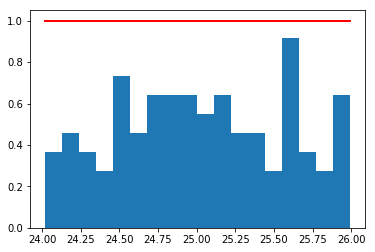

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#setting a scale factor....assumed to know this based on fictional linear expansion analysis
sc_factor = 0.999
temp = np.random.uniform(24,26, 100)
#temp
count, bins, ignored = plt.hist(temp, 18, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

df6 = pd.DataFrame({'Temp_length_1':bias_length_1 * sc_factor,'Temp_length_2':bias_length_2 * sc_factor,'Temp_width_1':bias_width_1 * sc_factor,'Temp_dia_1':bias_dia_1 * sc_factor})
#df6.head(3)

Temperature compensation can be worked out individually for each measurement. It's fairly complex from what i've researched for this project in that both the equipment and the article under inspection change due to temperature, at different rates and often they don't grow or shrink uniformly. Since it is complex, lets assume a scale correction factor is known in this case. The correction scale factor is 0.999 (because the components were oversize). The formula for linear expansion can be seen below. 

$$\Delta L = Lo * \alpha * \Delta T$$

where 
Lo = oringinal length, alpha = CTE for material and Delta T = change in temperature from reference 20 Degrees C 

In [10]:
df7 = pd.concat([df5,df6], axis=1)
df7.head(3)

,length_1,length_2,width_1,dia_1,err_length_1,err_length_2,err_width_1,err_dia_1,bias_length_1,bias_length_2,bias_width_1,bias_dia_1,Temp_length_1,Temp_length_2,Temp_width_1,Temp_dia_1
0,14.017222,10.052114,50.214770,30.010829,14.015688,10.047595,50.221916,29.987835,14.017874,10.049785,50.224066,29.990005,14.003856,10.039735,50.173842,29.960015
1,14.004780,10.063153,50.202275,29.997285,14.020876,10.049738,50.227041,30.003332,14.023062,10.051928,50.229191,30.005502,14.009039,10.041876,50.178962,29.975496
2,14.004596,10.056705,50.214649,29.996222,14.017223,10.056548,50.215184,30.004345,14.019409,10.058738,50.217334,30.006515,14.005390,10.048679,50.167117,29.976508


So the dataset is almost complete at this stage. It's not completely accurate in it's approach since it's ficticious. The order in which i've created the data might actually have to change for example, should i correct for temperature first then correct for Bias or vice versa and then calulate overall error? In a real situation this would involve some testing of the phenomena but at least i have the code created and as such it's possible to quickly rearrange this data and re-calculate if needed.  

## Uncertainty

The dataset needs one more block of information before it's complete. That is an uncertainty estimate. Again, this is synthetic but it is the priciple that is important. We are being asked to determine if the measured components are correct and or determine if they might be out of specification. We now have the data to determine this. We'll need to find our type A uncertainties and Type B uncertainties, get them in the same standard uncertainty and sum them.

### Calculating Type A Uncertainty

I have taken 100 readings above. They should be corrected before use. I have already corrected for bias and temperature so i will use the mean and standard deviation of the temperature corrected columns in dataframe 7. The formula below shows how to calculate the estimated standard deviation of the mean.It's already created but showing how it would normally be done.

$u = \frac{S}{\sqrt{n}}$

In [11]:
#to avoid too many underscores in var names, calling length_1 ft1, length_2 ft2, width_1 ft3 and dia_1 ft4 

#import the math module to use square root function.
import math

n=100 # n is the number of points

#calculate the mean and standard deviation for each of the 4 features
#using temp_length. I'm taking this as the corrected length
mean_ft1 = df7['Temp_length_1'].mean()
stdev_ft1 = df7['Temp_length_1'].std()

mean_ft2 = df7['Temp_length_2'].mean()
stdev_ft2 = df7['Temp_length_2'].std()

mean_ft3 = df7['Temp_width_1'].mean()
stdev_ft3 = df7['Temp_width_1'].std()

mean_ft4 = df7['Temp_dia_1'].mean()
stdev_ft4 = df7['Temp_dia_1'].std()

#calculate the type A uncertainty for each of the features
type_A_length_1 = stdev_ft1/math.sqrt(n)
type_A_length_2 = stdev_ft2/math.sqrt(n)
type_A_width_1 = stdev_ft3/math.sqrt(n)
type_A_dia_1 = stdev_ft4/math.sqrt(n)


print("TYPE A UNCERTAINTIES")
print("%.6f" % type_A_length_1)
print("%.6f" % type_A_length_2)
print("%.6f" % type_A_width_1)
print("%.6f" % type_A_dia_1)

TYPE A UNCERTAINTIES
0.000630
0.000741
0.000852
0.000723


### Calculating Type B Uncertainty

It was stated above that the verification had an uncertainty of 0.1% of mean reading. 

In [12]:
ver_ft1 = ((mean_ft1/100)*0.1) /2
ver_ft2 = ((mean_ft2/100)*0.1) /2
ver_ft3 = ((mean_ft3/100)*0.1) /2
ver_ft4 = ((mean_ft4/100)*0.1) /2

print("UNCERTAINTY DUE TO VERIFICATION")
print("%.6f" % ver_ft1)
print("%.6f" % ver_ft2)
print("%.6f" % ver_ft3)
print("%.6f" % ver_ft4)

UNCERTAINTY DUE TO VERIFICATION
0.007001
0.005023
0.025083
0.014988


The divisions on the scale of the instrument have a resolution of +/- 0.001. I'll assume uniform distribution since the values can likely fall anywhere between 0.002 or +/-0.001. This applies to all features.

In [13]:
import math
res = 0.001
res_uncert = res/math.sqrt(3)

print("UNCERTAINTY DUE TO RESOLUTION")
print("%.6f" % res_uncert)

UNCERTAINTY DUE TO RESOLUTION
0.000577


I'm going to use the following formula to get my overall uncertainty. Hopefully all my deviations are now in the same confidence level of 95% or K=2.

$$u = \sqrt{type A^2 +type B^2}$$

In [14]:
#set the coverage factor K to 2 to express uncertainty at 95% confidence
k=2

# defining the uncertainties in each feature using the formula above
ulength_1 = math.sqrt(type_A_length_1**2 + ver_ft1**2 + res_uncert**2)*k
ulength_2 = math.sqrt(type_A_length_2**2 + ver_ft2**2 + res_uncert**2)*k
uwidth_1 = math.sqrt(type_A_width_1**2 + ver_ft3**2 + res_uncert**2)*k
udia_1 = math.sqrt(type_A_dia_1**2 + ver_ft4**2 + res_uncert**2)*k

print("COMBINED UNCERTAINTIES at 95% CF, COVERAGE FACTOR = 2")
print("%.6f" % ulength_1)
print("%.6f" % ulength_2)
print("%.6f" % uwidth_1)
print("%.6f" % udia_1)

COMBINED UNCERTAINTIES at 95% CF, COVERAGE FACTOR = 2
0.014107
0.010220
0.050209
0.030033


In [15]:
#defining these variables
Temp_length_1 = bias_length_1 * sc_factor
Temp_length_2 = bias_length_2 * sc_factor
Temp_width_1 = bias_width_1 * sc_factor
Temp_dia_1 = bias_dia_1 * sc_factor
posulength_1 = Temp_length_1 + ulength_1
negulength_1 = Temp_length_1 - ulength_1
posulength_2 = Temp_length_2 + ulength_2
negulength_2 = Temp_length_2 - ulength_2
posuwidth_1 = Temp_width_1 + uwidth_1
neguwidth_1 = Temp_width_1 - uwidth_1
posudia_1 = Temp_dia_1 + udia_1
negudia_1 = Temp_dia_1 - udia_1


df8 = pd.DataFrame({'posulength_1':Temp_length_1 + ulength_1,'negulength_1':Temp_length_1 - ulength_1,'posulength_2':Temp_length_2 + ulength_2,'negulength_2':Temp_length_2 - ulength_2, 'posuwidth_1':Temp_width_1 + uwidth_1,'neguwidth_1':Temp_width_1 - uwidth_1,'posudia_1':Temp_dia_1 + udia_1,'negudia_1':Temp_dia_1 - udia_1}, index=range(0,100))

df9 = pd.concat([df7,df8], axis=1)
#df9.head(3)

In [16]:
#adding two categories, User and Instrument. This is useful for sorting if there are more than one user or instrument.
#categories make it easier to sort and use 'grouby' with the dataframe. While I don't actually need it here it's important to note. 
User = ['Mary']
Instrument = ['CMM']

#create the dataframe containing the two new categories.
df10=pd.DataFrame({'Instrument':Instrument,'User': User}, index=range(0,100))
#left join so df10 is first, df9 is added to df10.
#could also change axis for the join of df's here but it's not useful in this particular case.
df11 = pd.concat([df10,df9], axis=1)
#df11.head(3)

Text(0.5,1,'Effects of positve uncertainty on the measurement')

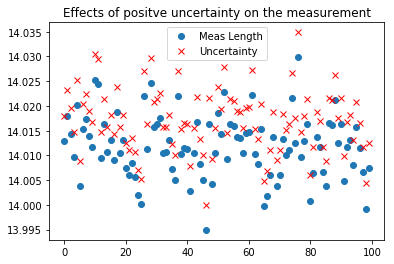

In [17]:
#importing libraries and modules.
import matplotlib.pyplot as plt
import pandas as pd

#showing a scatter plot of the measurement vs max possible measurement.
c = {'Meas Length':length_1,'Uncertainty':posulength_1}   
df=pd.DataFrame(c)
df.plot(style=['o','rx'])
plt.title("Effects of positve uncertainty on the measurement")

Text(0.5,1,'Effects of negative uncertainty on the measurement')

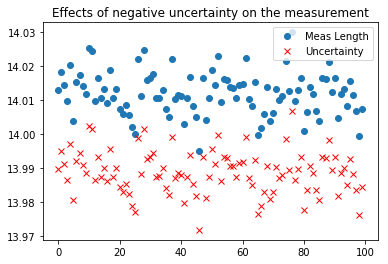

In [18]:
#importing libraries and modules.
import matplotlib.pyplot as plt
import pandas as pd

#showing a scatter plot of the measurement vs min possible measurement. 
c = {'Meas Length':length_1,'Uncertainty':negulength_1}   
df=pd.DataFrame(c)
df.plot(style=['o','rx'])
plt.title("Effects of negative uncertainty on the measurement")

In [19]:
import pandas as pd
df15 = pd.DataFrame({'length_1':length_1,'negulength_1':negulength_1,'posulength_1':posulength_1})
df16 = pd.DataFrame({'length_1':length_1,'negulength_1':negulength_1})

### Example of isolating features for analysis

Text(0.5,1,'Length_1 + / - Uncertainty Analysis')

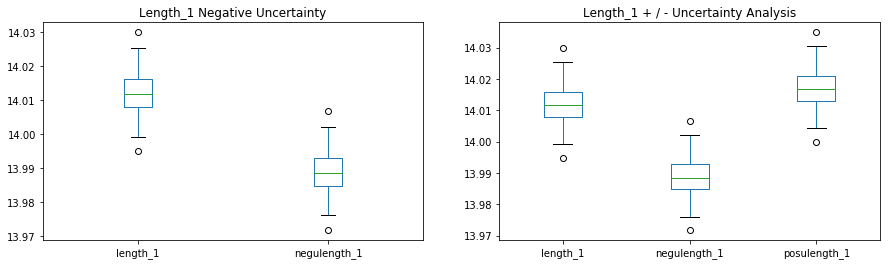

In [20]:
#importing libraries and modules
import matplotlib.pyplot as plt
#setup parameters for plots - note you can change 'box' to 'bar' or other if applicable.
fig,axes=plt.subplots(1,2,figsize=(15,4))
#set df16 on axis 0 , set df15 on axis 1 
df16.plot(kind='box',ax=axes[0])
df15.plot(kind='box',ax=axes[1])
#just setting a title for each axis box plot.
axes[0].set_title("Length_1 Negative Uncertainty")
axes[1].set_title("Length_1 + / - Uncertainty Analysis")

### The next 4 box plots show analysis of all phenomena together for each feature.

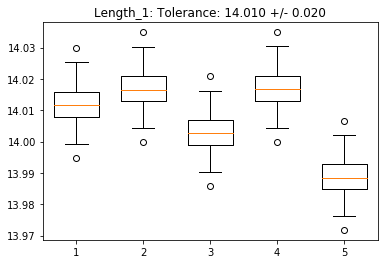

In [21]:
#importing libraries and modules.
import numpy as np
import matplotlib.pyplot as plt

#a different way of doing boxplots
#show box plots for the various measurements for length_1 
data = length_1, bias_length_1, Temp_length_1,posulength_1, negulength_1
plt.boxplot(data, showfliers=True, widths =(0.67))
plt.title('Length_1: Tolerance: 14.010 +/- 0.020')
plt.show()

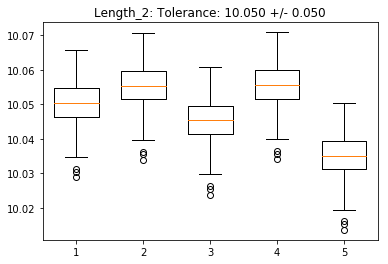

In [22]:
#importing libraries and modules.
import numpy as np
import matplotlib.pyplot as plt

#show box plots for the various measurements of length_2 
data2 = length_2, bias_length_2, Temp_length_2, posulength_2, negulength_2
plt.boxplot(data2,showfliers=True, widths =(0.67))
plt.title('Length_2: Tolerance: 10.050 +/- 0.050')
plt.show()

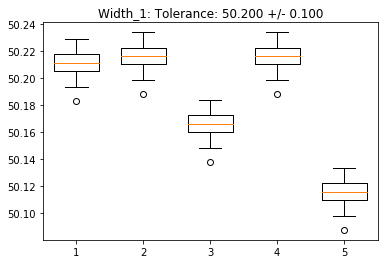

In [23]:
#importing libraries and modules.
import numpy as np
import matplotlib.pyplot as plt

#show box plots for the various measurements for width_1
data3 = width_1, bias_width_1, Temp_width_1, posuwidth_1, neguwidth_1
plt.boxplot(data3, showfliers=True, widths =(0.67))
plt.title('Width_1: Tolerance: 50.200 +/- 0.100')
plt.show()

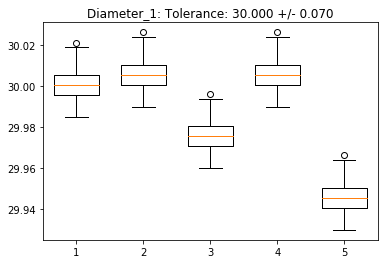

In [24]:
#importing libraries and modules.
import numpy as np
import matplotlib.pyplot as plt

#show box plots for the various measurements for dia_1
data4 = dia_1, bias_dia_1, Temp_dia_1, posudia_1, negudia_1
plt.boxplot(data4, showfliers=True, widths =(0.67))
plt.title('Diameter_1: Tolerance: 30.000 +/- 0.070')
plt.show()

## Are the components good or bad ?

It's quite likely that the components are out of specification. When the uncertainty is factored in (assuming the measurement system is actually using all of its uncertainty) you can see from the box plots that the component could be out of specification, even though the measurement result can appear in specification. This measurement system needs to be improved before it can continue to classify components as 'good' or 'bad' or optionally the aerospace company needs to reduce the tolerance band to account for this uncertainty and avoid passing bad components.This might lead to more rejections but ultimately fewer defective components going out the door.  

## Wait ! What do you mean good or bad?

Well, if you just took the accuracy alone and compared it to tolerance you would get 1% misclassification chance according to ISO 10012 standards.

In [25]:
# find the percentage of tolerance consumed - note half tolerance used since it might be either positve or negative.
error = (err_length_1/0.020)*100
print('Percentage Tolerance Consumed = '"%.1f" % error)

# find the ratio of accuracy to tolerance
ratio = (0.020/err_length_1)
print ('Accuracy to Tolerance Ratio = '"%.1f" % ratio)

Percentage Tolerance Consumed = 14.1
Accuracy to Tolerance Ratio = 7.1


At this point it's correct to think that it's not bad - this instrument is good enough for the job because of root sum square theory: 7:1 = 7 +/-1 with an actual value = 6 or 8 and an expanded value = 8


In [26]:
#find the % risk of misclassification i.e. a bad component good or a good component bad. 
value = 7
actual = math.sqrt(7**2 + 1**2)

percent_risk = ((actual-value)/value) *100
print('Percentage Risk of Misclassification = '"%.1f" % percent_risk)

Percentage Risk of Misclassification = 1.0


But now if you analyse uncertainty you would get:

In [27]:
#find the percentage of tolerance consumed - note half tolerance used since it might be either positve or negative.
#same as code above, using uncertainty instead of accuracy to show the difference.
error = (ulength_1/0.020)*100
print('Percentage Tolerance Consumed = '"%.1f" % error)

ratio = (0.020/ulength_1)
print ('Uncertainty to Tolerance Ratio = '"%.1f" % ratio)
value = 1.4
actual = math.sqrt(1.4**2 + 1**2)

percent_risk = ((actual-value)/value) *100
print('Percentage Risk of Misclassification = '"%.1f" % percent_risk)

Percentage Tolerance Consumed = 70.5
Uncertainty to Tolerance Ratio = 1.4
Percentage Risk of Misclassification = 22.9


The ratio becomes unacceptable and the risk of missclassification is too great at 22.9%. Approximately 70% of the tolerance is consumed by the measurement uncertainty leading to a ratio of 1.4:1 of uncertainty to tolerance.

In [28]:
#note, please set the seed at the beginning of this program if repeatability is required. Percentages in markdown cell above might not match results in code.
#set the seed
#np.random.seed(enter value here)

### Conclusion

From the analysis above, it's clear that many phenomena occur and come together to influence a typical measurement or set of measurements. In this case, it's possible to see, calculate and even isolate each effect but ultimately being aware of their existence and being able to put an number or estimate on this overall variance is extremely useful. Imagine if for example you had to purchase 10 lab instruments and 20 manufacturing floor based instruments but you don't yet have any components to test. Also, you don't want to buy them only to find out they are not the right instrument for the job. How would you do it? With this analysis script, you could quickly create a dataset, then induce the variance for different instruments and estimate other variances to get a better understanding of what quality of observations you can take.During research for this project, I also came across a method for uncertainty analysis called Monte Carlo Simulation. One of it's applications was the use of simultated measurements of an article under inspection (component) using single or multiple instruments. By using the strengths of different instruments that were measuring the same points it was able to simultate the best possible result/most likely zone where the points/measurements actually were. I think something like this would be particularly useful for working out uncertainty for not just observations but for fitting of specific geometries e.g. a cone, circle, line, sphere, cyclinder or a plane.    

### DataFrame

In [29]:
df11

,Instrument,User,length_1,length_2,width_1,dia_1,err_length_1,err_length_2,err_width_1,err_dia_1,...,Temp_width_1,Temp_dia_1,posulength_1,negulength_1,posulength_2,negulength_2,posuwidth_1,neguwidth_1,posudia_1,negudia_1
0,CMM,Mary,14.017222,10.052114,50.214770,30.010829,14.015688,10.047595,50.221916,29.987835,...,50.173842,29.960015,14.017962,13.989749,10.049955,10.029515,50.224051,50.123633,29.990048,29.929982
1,CMM,Mary,14.004780,10.063153,50.202275,29.997285,14.020876,10.049738,50.227041,30.003332,...,50.178962,29.975496,14.023146,13.994933,10.052096,10.031657,50.229171,50.128753,30.005529,29.945464
2,CMM,Mary,14.004596,10.056705,50.214649,29.996222,14.017223,10.056548,50.215184,30.004345,...,50.167117,29.976508,14.019496,13.991283,10.058899,10.038460,50.217326,50.116908,30.006541,29.946475
3,CMM,Mary,14.018296,10.046192,50.202704,30.003647,14.012494,10.053874,50.207992,30.009478,...,50.159932,29.981636,14.014772,13.986559,10.056228,10.035789,50.210141,50.109723,30.011669,29.951603
4,CMM,Mary,14.006170,10.057101,50.206048,30.005969,14.022967,10.041815,50.186071,30.001978,...,50.138032,29.974144,14.025235,13.997022,10.044180,10.023741,50.188241,50.087823,30.004177,29.944111
5,CMM,Mary,14.016051,10.056210,50.209711,30.013556,14.006629,10.054772,50.217652,30.008998,...,50.169582,29.981157,14.008913,13.980699,10.057125,10.036686,50.219791,50.119373,30.011190,29.951124
6,CMM,Mary,14.010080,10.050607,50.210511,30.013408,14.018115,10.054738,50.224684,30.012196,...,50.176607,29.984351,14.020388,13.992174,10.057090,10.036651,50.226816,50.126398,30.014384,29.954319
7,CMM,Mary,13.994599,10.052802,50.202763,30.015899,14.020238,10.052387,50.212001,29.992839,...,50.163936,29.965014,14.022509,13.994295,10.054742,10.034303,50.214145,50.113727,29.995047,29.934981
8,CMM,Mary,14.009151,10.038878,50.229881,30.000932,14.016737,10.063439,50.212606,30.005850,...,50.164541,29.978012,14.019011,13.990798,10.065783,10.045344,50.214750,50.114332,30.008045,29.947979
9,CMM,Mary,14.006624,10.056413,50.200173,30.005035,14.014428,10.051165,50.208024,29.996713,...,50.159963,29.968884,14.016704,13.988490,10.053521,10.033082,50.210172,50.109755,29.998917,29.938851
